In [58]:
import numpy as np
from maximus48 import SSIM_131119 as SSIM
from maximus48 import var
import tifffile
import matplotlib.pyplot as plt
import os

## Open one dataset

In [6]:
folder = '/mnt/beegfs/P14/2020/p3l-gleb1/20201129/RAW_DATA/imaging/'
#folder = '/Users/au704469/Documents/Postdoc/Results/X-ray_tomography/Brain_organoid_P14_DESY_Nov2020/Data_test/'+distance+'mm/'

In [7]:
#create the list all images in the folder
imlist = os.listdir(folder)

In [108]:
#[print(i) for i in imlist if ('0001.tiff') in i and not i.startswith('ff')]

## Stitch the data

In [129]:
# select just one distance and one acquisition
def find_paths_single_distance_all(data_list, key, distance, image):
    return [i for i in data_list if (i.startswith(key) and distance in i and image in i)]

In [171]:
# this is also very ugly way of sorting
def find_counter(string, start='140mm_', end = '_00001.tiff'):
    return (string.split(start))[1].split(end)[0]

In [176]:
data_test = find_paths_single_distance_all(imlist, key ='try0', distance = '140mm', image = '0001.tiff')

# note - this sorting may not work for other examples (other than 140mm distance), needs to be tested
data_test = sorted(data_test, key=lambda i: int(find_counter(i)))

In [178]:
data_test

['try0_full_140mm_1_00001.tiff',
 'try0_full_140mm_2_00001.tiff',
 'try0_full_140mm_3_00001.tiff',
 'try0_full_140mm_4_00001.tiff',
 'try0_full_140mm_5_00001.tiff',
 'try0_full_140mm_6_00001.tiff',
 'try0_full_140mm_7_00001.tiff',
 'try0_full_140mm_8_00001.tiff',
 'try0_full_140mm_9_00001.tiff',
 'try0_full_140mm_10_00001.tiff',
 'try0_full_140mm_11_00001.tiff',
 'try0_full_140mm_12_00001.tiff',
 'try0_full_140mm_13_00001.tiff',
 'try0_full_140mm_14_00001.tiff',
 'try0_full_140mm_15_00001.tiff',
 'try0_full_140mm_16_00001.tiff',
 'try0_full_140mm_17_00001.tiff',
 'try0_full_140mm_18_00001.tiff',
 'try0_full_140mm_19_00001.tiff',
 'try0_full_140mm_20_00001.tiff',
 'try0_full_140mm_21_00001.tiff',
 'try0_full_140mm_22_00001.tiff',
 'try0_full_140mm_23_00001.tiff',
 'try0_full_140mm_24_00001.tiff',
 'try0_full_140mm_25_00001.tiff',
 'try0_full_140mm_26_00001.tiff',
 'try0_full_140mm_27_00001.tiff',
 'try0_full_140mm_28_00001.tiff',
 'try0_full_140mm_29_00001.tiff',
 'try0_full_140mm_30_00

TODO: 
- here one needs to add ff-correction 

In [ ]:
"""
you need something like

for in in data_test:
    read one image (i)
    find proper flatfield paths
    read them
    make ff-correction
    return ff-corrected images
"""

And now when you have ff-corrected images <br>
- implement a function to stitch images into one big image

two parts/funcions above can be done independently

## ff-correction

**test data**

In [9]:
# select just one distance and one acquisition
def find_paths_single_distance(data_list, key):
    return [i for i in data_list if i.startswith(key)]
    #return [i for i in data_list if i.startswith('ff_try0_full_'+distance+'mm_'+section+'_')


In [94]:
# take some random set
data_test = find_paths_single_distance(imlist, 'try0_full_140mm_1')
ff_test = find_paths_single_distance(imlist, 'ff_try0_full_140mm_1')
data_test.sort(), ff_test.sort()


# note -> sort function could be improved 

(None, None)

In [95]:
#set the ROI of image first, the logic corresponds to FIJI (to be read (x,y,x1,y1 at the image - inverse to numpy!)
ROI = (100,100,2048,2048) 
folder = '/mnt/beegfs/P14/2020/p3l-gleb1/20201129/RAW_DATA/imaging/'
#folder = '/Users/au704469/Documents/Postdoc/Results/X-ray_tomography/Brain_organoid_P14_DESY_Nov2020/Data_test/'+distance+'mm/'


In [96]:
# test with just 3 images
image_data = data_test[:3]
ff_data = ff_test

In [97]:
images = np.asarray([tifffile.imread(folder+im) for im in image_data])
images = images[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]

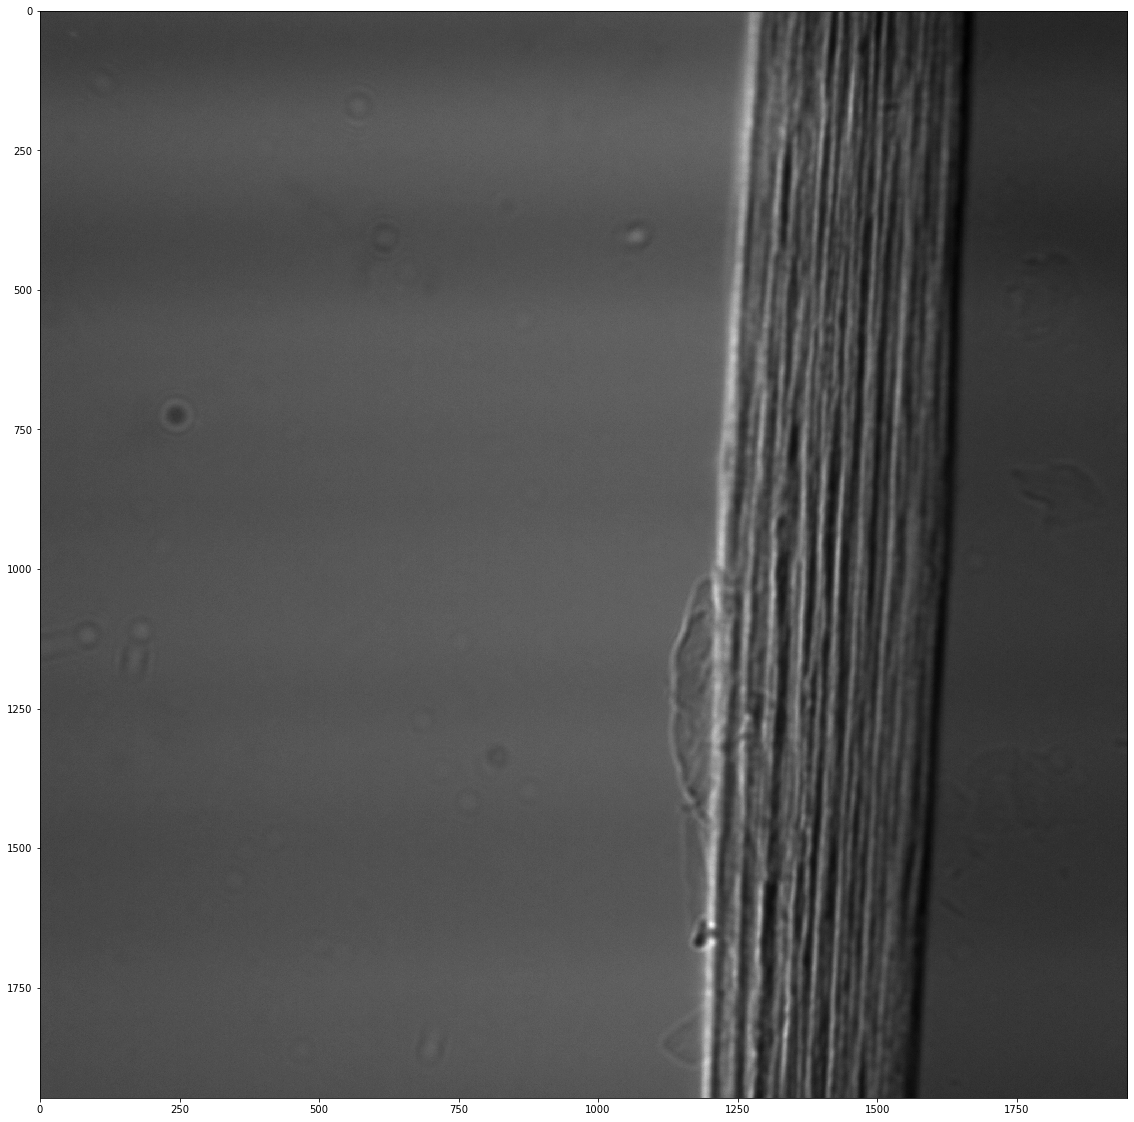

In [98]:
# not filtered image
var.show(images[2])

In [99]:
flatfield = np.asarray([tifffile.imread(folder+im) for im in ff_data])
flatfield = flatfield[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]
flatfield = np.transpose(flatfield, (1,2,0))

In [100]:
# images should be set as special classes:
ff_class = SSIM.SSIM_const(flatfield)

# a list to store results
result = []

for count,item in enumerate(images):
    image_class = SSIM.SSIM_const(item)
    index = SSIM.SSIM(image_class, ff_class).ssim()
    result.append(np.asarray(item/flatfield[:,:,np.argmax(index)]))
    print('processed image ', image_data[count])

processed image  try0_full_140mm_100_00001.tiff
processed image  try0_full_140mm_100_00002.tiff
processed image  try0_full_140mm_100_00003.tiff


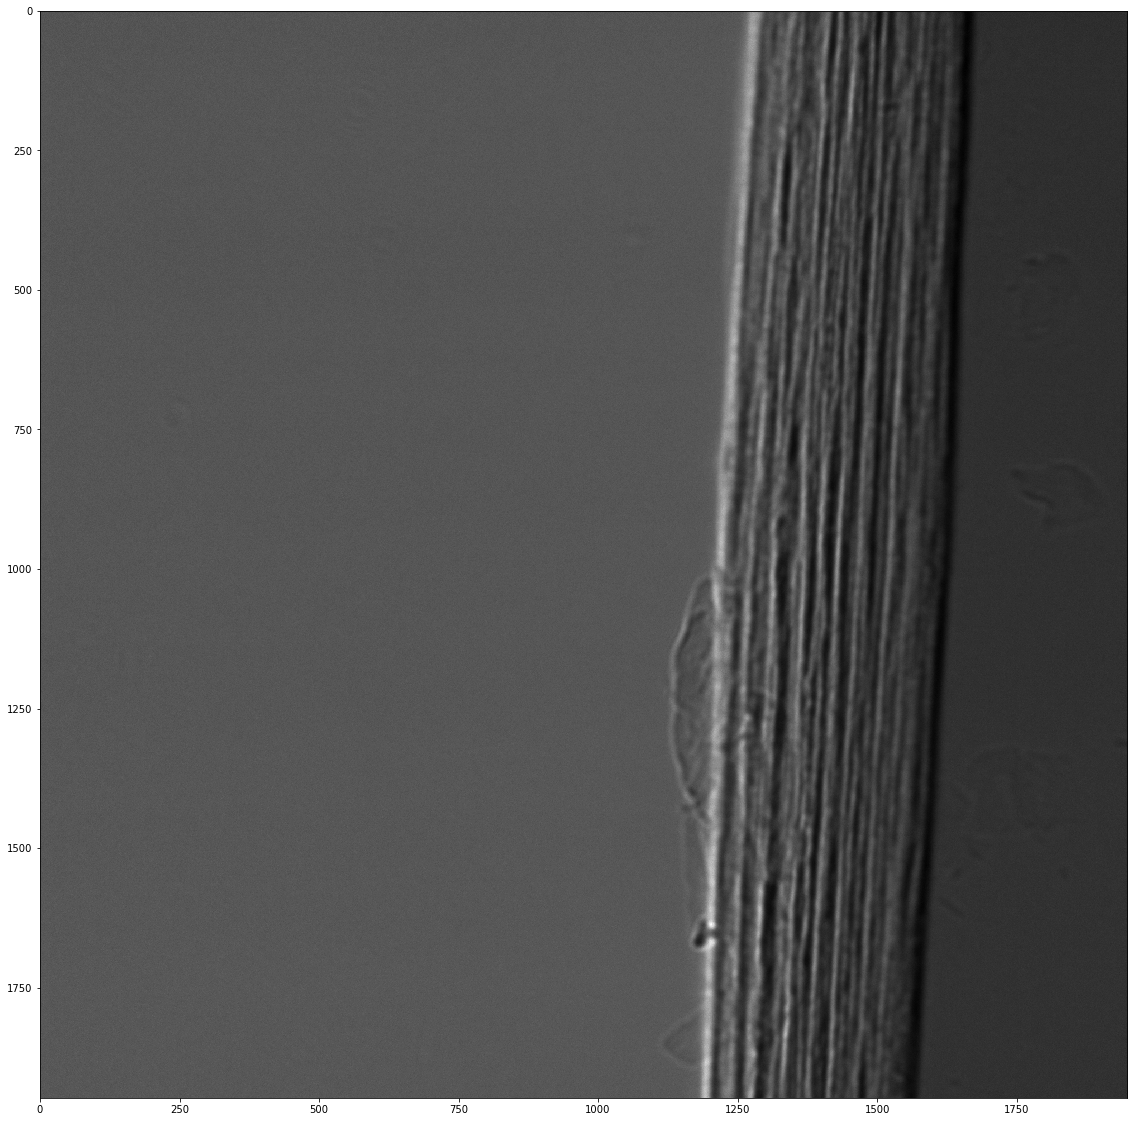

In [101]:
# filtered image
var.show(result[2])

**try a function for ff-correction**

In [105]:
def ff_correct_one(image_data, ff_data, ROI=(0,0,2048,2048)):    
    """
    This function takes 1 data image and ff corrects it
    
    image_data: str
        path to images
    ff_data: list
        paths to ff
        
    Returns
    out: 3D numpy array
    """
    

    # read images
    images = np.asarray([tifffile.imread(folder+im) for im in image_data])
    images = images[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]

    #read ff-files
    flatfield = np.asarray([tifffile.imread(folder+im) for im in ff_data])
    flatfield = flatfield[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]

    # please transpose the ff-array for the further ff-correction
    flatfield = np.transpose(flatfield, (1,2,0))
    
    # images should be set as special classes:
    image_class = SSIM.SSIM_const(images)
    ff_class = SSIM.SSIM_const(flatfield)

    # then, you can calculate SSIM metrics for each pair (data-image) - (ff-image)
    index = SSIM.SSIM(image_class, ff_class).ssim()

    # now, simply divide your image by flatfield-image with highest SSIM-index and get a corrected image:
    result = np.asarray(images[:]/flatfield[:,:,np.argmax(index)])
    return result






def ff_correct_list(image_data, ff_data, ROI=(0,0,2048,2048)):    
    """
    This function takes several data images and ff corrects it
    
    image_data: list
        paths to images
    ff_data: list
        paths to ff
        
    Returns
    out: 3D numpy array
    """
    

    # read images
    images = np.asarray([tifffile.imread(folder+im) for im in image_data])
    images = images[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]

    #read ff-files
    flatfield = np.asarray([tifffile.imread(folder+im) for im in ff_data])
    flatfield = flatfield[:,ROI[1]:ROI[3], ROI[0]:ROI[2]]

    # please transpose the ff-array for the further ff-correction
    flatfield = np.transpose(flatfield, (1,2,0))
    
    # images should be set as special classes:
    ff_class = SSIM.SSIM_const(flatfield)

    # a list to store results
    result = []

    for count,item in enumerate(images):
        image_class = SSIM.SSIM_const(item)
        index = SSIM.SSIM(image_class, ff_class).ssim()
        result.append(np.asarray(item/flatfield[:,:,np.argmax(index)]))
        print('processed image ', image_data[count])
        
    return result


In [106]:
test = ff_correct_list(data_test[:3],ff_test, ROI=ROI)

processed image  try0_full_140mm_100_00001.tiff
processed image  try0_full_140mm_100_00002.tiff
processed image  try0_full_140mm_100_00003.tiff


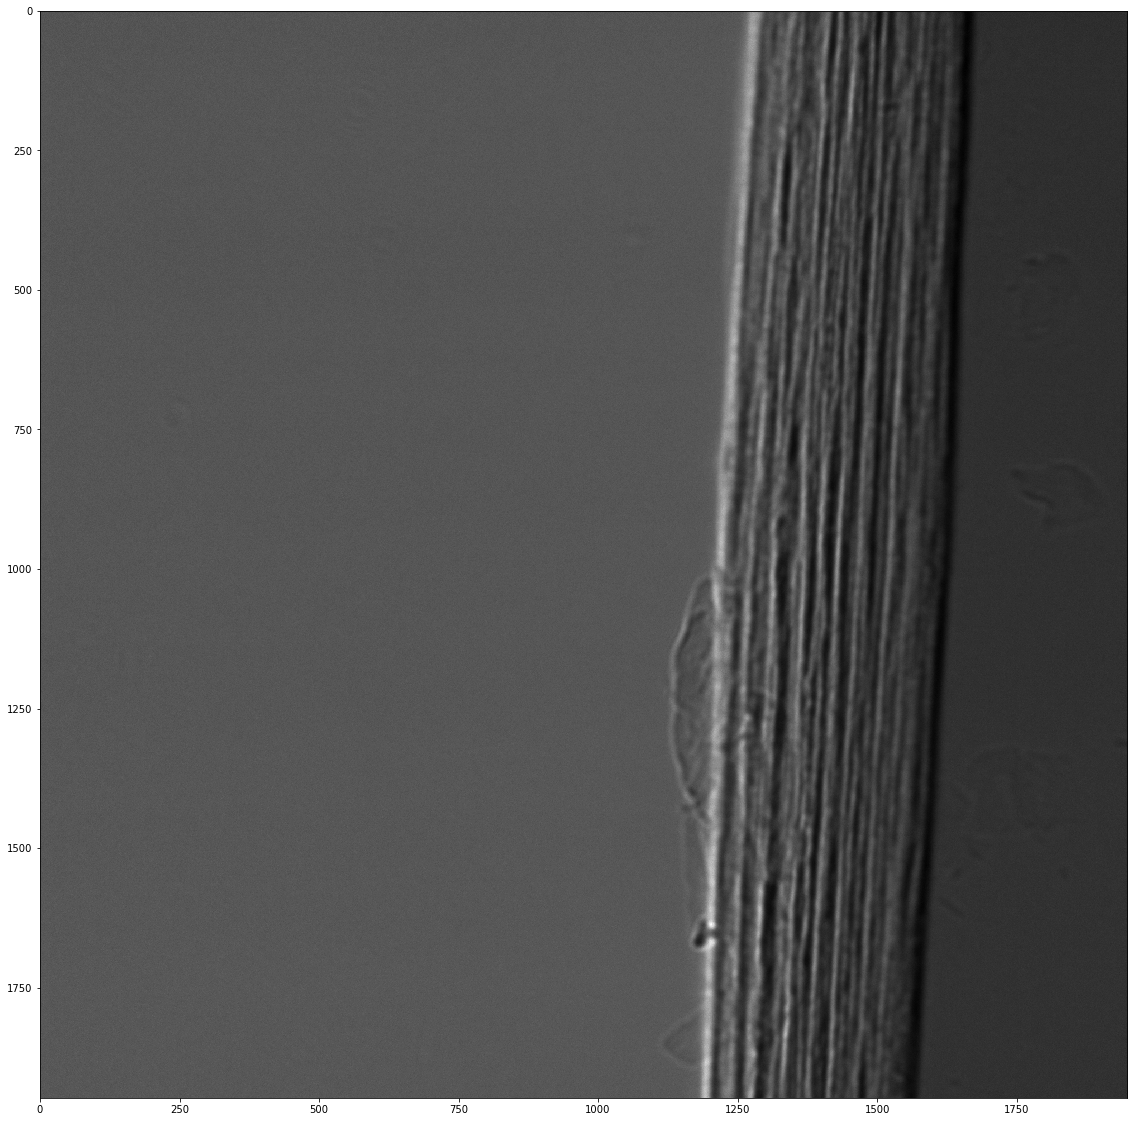

In [107]:
# filtered image
var.show(test[2])